<a href="https://colab.research.google.com/github/JWK7/CMPE-255-Group-5-Spotify-Recommendation-System/blob/master/Spotify_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
## Import the csv into a pandas dataframe
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [32]:
spotify_data = pd.read_csv("/content/tracks.csv")

In [33]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [34]:
#Dropping unncessary columns (id and id_artists)
spotify_data = spotify_data.drop(["id","id_artists"],axis=1)

In [35]:
spotify_data.columns

Index(['name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [36]:
#checking for missing values
print("Missing in name: ",spotify_data.name.isna().sum())
print("Missing in popularity: ",spotify_data.popularity.isna().sum())
print("Missing in duration_ms: ",spotify_data.duration_ms.isna().sum())
print("Missing in explicit: ",spotify_data.explicit.isna().sum())
print("Missing in artists: ",spotify_data.artists.isna().sum())
print("Missing in release_date: ",spotify_data.release_date.isna().sum())
print("Missing in danceability: ",spotify_data.danceability.isna().sum())
print("Missing in energy: ",spotify_data.energy.isna().sum())
print("Missing in key: ",spotify_data.key.isna().sum())
print("Missing in loudness: ",spotify_data.loudness.isna().sum())
print("Missing in mode: ",spotify_data["mode"].isna().sum())
print("Missing in speechiness: ",spotify_data.speechiness.isna().sum())
print("Missing in acousticness: ",spotify_data.acousticness.isna().sum())
print("Missing in instrumentalness: ",spotify_data.instrumentalness.isna().sum())
print("Missing in liveness: ",spotify_data.liveness.isna().sum())
print("Missing in valence: ",spotify_data.valence.isna().sum())
print("Missing in tempo: ",spotify_data.tempo.isna().sum())
print("Missing in time_signature: ",spotify_data.time_signature.isna().sum())

Missing in name:  71
Missing in popularity:  0
Missing in duration_ms:  0
Missing in explicit:  0
Missing in artists:  0
Missing in release_date:  0
Missing in danceability:  0
Missing in energy:  0
Missing in key:  0
Missing in loudness:  0
Missing in mode:  0
Missing in speechiness:  0
Missing in acousticness:  0
Missing in instrumentalness:  0
Missing in liveness:  0
Missing in valence:  0
Missing in tempo:  0
Missing in time_signature:  0


In [37]:
spotify_data = spotify_data.dropna()
#checking for missing values
print("Missing in name: ",spotify_data.name.isna().sum())
print("Missing in popularity: ",spotify_data.popularity.isna().sum())
print("Missing in duration_ms: ",spotify_data.duration_ms.isna().sum())
print("Missing in explicit: ",spotify_data.explicit.isna().sum())
print("Missing in artists: ",spotify_data.artists.isna().sum())
print("Missing in release_date: ",spotify_data.release_date.isna().sum())
print("Missing in danceability: ",spotify_data.danceability.isna().sum())
print("Missing in energy: ",spotify_data.energy.isna().sum())
print("Missing in key: ",spotify_data.key.isna().sum())
print("Missing in loudness: ",spotify_data.loudness.isna().sum())
print("Missing in mode: ",spotify_data["mode"].isna().sum())
print("Missing in speechiness: ",spotify_data.speechiness.isna().sum())
print("Missing in acousticness: ",spotify_data.acousticness.isna().sum())
print("Missing in instrumentalness: ",spotify_data.instrumentalness.isna().sum())
print("Missing in liveness: ",spotify_data.liveness.isna().sum())
print("Missing in valence: ",spotify_data.valence.isna().sum())
print("Missing in tempo: ",spotify_data.tempo.isna().sum())
print("Missing in time_signature: ",spotify_data.time_signature.isna().sum())

Missing in name:  0
Missing in popularity:  0
Missing in duration_ms:  0
Missing in explicit:  0
Missing in artists:  0
Missing in release_date:  0
Missing in danceability:  0
Missing in energy:  0
Missing in key:  0
Missing in loudness:  0
Missing in mode:  0
Missing in speechiness:  0
Missing in acousticness:  0
Missing in instrumentalness:  0
Missing in liveness:  0
Missing in valence:  0
Missing in tempo:  0
Missing in time_signature:  0


In [38]:
spotify_data = spotify_data.drop(spotify_data[spotify_data['name'].isnull()].index)
print("Missing in name: ",spotify_data.name.isna().sum())

Missing in name:  0


In [39]:
spotify_data.release_date.unique()

array(['1922-02-22', '1922-06-01', '1922-03-21', ..., '1991-05',
       '1996-10-06', '2009-11-28'], dtype=object)

In [40]:
spotify_data.release_date[:]= spotify_data.release_date[:].str[0:4]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
spotify_data.release_date = pd.to_numeric(spotify_data.release_date)

In [42]:
#ENCODING
from sklearn.preprocessing import LabelEncoder

#Label Encoding for the column
label_encoder=LabelEncoder()

label_encoder.classes=np.array(['',])
spotify_data["name"]=label_encoder.fit_transform(spotify_data["name"])
nameMapping = dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))

print(spotify_data["name"])

label_encoder.classes=np.array(['',])
label_encoder=LabelEncoder()
spotify_data["artists"]=label_encoder.fit_transform(spotify_data["artists"])
artistMapping = dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))

print(spotify_data["artists"])


0          62328
1          60987
2         377628
3         106033
4         198883
           ...  
586667    429410
586668    399846
586669    384868
586670     13688
586671    220476
Name: name, Length: 586601, dtype: int64
0         103290
1          32586
2          44116
3          44116
4          25189
           ...  
586667    113812
586668     81826
586669     31568
586670     36288
586671      3264
Name: artists, Length: 586601, dtype: int64


In [43]:
nameMapping

{'!': 0,
 '! (The Song Formerly Known As)': 1,
 '!!De Repente!!': 2,
 '!H.a.p.p.y!': 3,
 "!I'll Be Back!": 4,
 "!Me Voy Pal' Pueblo - Live": 5,
 '!Que Vida! - Mono Version': 6,
 '!Uno! . . .': 7,
 '" Achtung, fertig los! "': 8,
 '" Artista " Por un Mes': 9,
 '" El Profesor Tachuela " (Tacuarembó)': 10,
 '"16 tonna" fekete szén': 11,
 '"2"': 12,
 '"20" Kaksikymppinen': 13,
 '"33"': 14,
 '"40" - Live': 15,
 '"40" - Remastered 2008': 16,
 '"43"': 17,
 '"A" You\'re Adorable': 18,
 '"Addio, mio dolce amor!" from Edgar (Act III) - Voice': 19,
 '"Amarilli mia bella" - 1955 Version': 20,
 '"Anne-Marie Stretter, Lol V. Stein..."': 21,
 '"Arkadaş" Şarkısını Duyunca': 22,
 '"Autoportrait, je ne comprends pas..."': 23,
 '"B" Movie Box Car Blues - Live': 24,
 '"Blasco" Rossi - Live From Milan,Italy/1989': 25,
 '"C" is for Cookie - Live': 26,
 '"Carmen Fantasie", by Franz Waxman, based on themes from an opera by Georges Bizet': 27,
 '"Cassius" Love Vs. "Sonny" Wilson - Remastered 2001': 28,
 '"Ch\'i

In [44]:
artistMapping

{'["\'In The Heights\' Original Broadway Company", \'Mandy Gonzalez\']': 0,
 '["\'Om\' Alec Khaoli & Umoja"]': 1,
 '["\'T Hof Van Commerce", \'TLP\']': 2,
 '["\'T Hof Van Commerce"]': 3,
 '["\'Til Tuesday"]': 4,
 '["100 First Songs\' Participants"]': 5,
 '["23\'O"]': 6,
 '["5\'nizza", \'[dunkelbunt]\']': 7,
 '["5\'nizza"]': 8,
 '["5/8erl In Ehr\'n"]': 9,
 '["90\'s FIN Cover Boyz & Girlz!"]': 10,
 '["A girl with her friends recorded at St. Ann\'s College"]': 11,
 '["A\'Studio"]': 12,
 '["AKA ChaP in 00\'S"]': 13,
 '["Adam & die Micky\'s"]': 14,
 '["Adolescent\'s Orquesta"]': 15,
 '["Agrupación Así D\' Ron"]': 16,
 '["Aidan O\'Rourke", \'Kit Downes\']': 17,
 '["Al\'fa"]': 18,
 '["Alan Davey\'s Eclectic Devils"]': 19,
 '["Alex D\'Castro"]': 20,
 '["Alex D\'Elia", \'Nihil Young\']': 21,
 '["Alex O\'Rion"]': 22,
 '["Alexander \'Skip\' Spence"]': 23,
 '["Alexander O\'Neal", \'Cherrelle\']': 24,
 '["Alexander O\'Neal"]': 25,
 '["Alexis Korner\'s Blues Incorporated"]': 26,
 '["Alibi Montana fe

In [45]:
# standardize all quantitative columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(spotify_data)
spotify_data_scaled = scaler.transform(spotify_data)

In [46]:
df = pd.DataFrame(spotify_data_scaled, columns = spotify_data.columns)

PCA Eigen Values [1452.39481084  986.11982149  890.34360434  839.91756344  814.03868029
  780.97560468  766.68133762  740.02103681  727.52822664  716.25516646
  705.99416639  690.3019829   656.76661594  608.44822557  503.64913409
  489.62404576  424.12496545  280.45915754]
PCA Explained Variance [3.59606322 1.65774344 1.35136675 1.20262788 1.12966071 1.03975945
 1.00204615 0.93356825 0.90231388 0.87456779 0.84968933 0.8123369
 0.73532627 0.6311102  0.43242832 0.40868003 0.30665187 0.13409025]
Sum of top 2 Explained Variance 12.815149732530733
Sum of all Explained Variance 18.00003068530514
Percent of top 2 Explained Variance over Total Explained Variance 0.7119515492266777


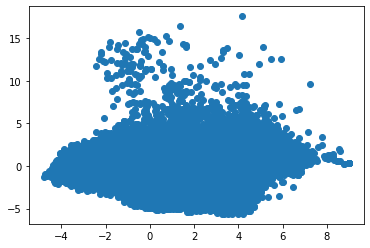

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=18)
x = pca.fit_transform(df)
x = pd.DataFrame(x)
plt.scatter(x[0],x[1])
print("PCA Eigen Values",pca.singular_values_)
print("PCA Explained Variance",pca.explained_variance_)

print("Sum of top 2 Explained Variance",sum(pca.explained_variance_[:9]))
print("Sum of all Explained Variance",sum(pca.explained_variance_))
print("Percent of top 2 Explained Variance over Total Explained Variance",sum(pca.explained_variance_[:9])/sum(pca.explained_variance_))
  

In [48]:
pca = PCA(n_components=9)
spotifyPCA_DF = pca.fit_transform(df)
spotifyPCA_DF = pd.DataFrame(spotifyPCA_DF)



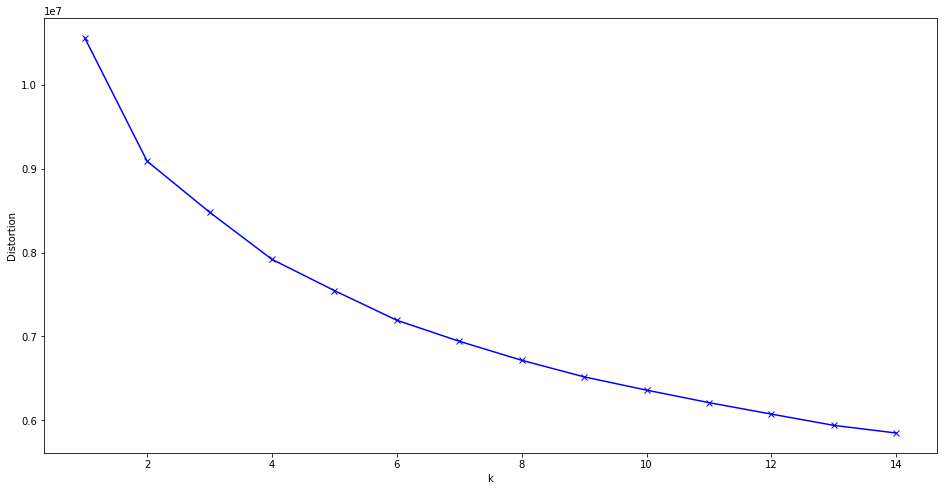

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
km = KMeans(n_clusters=7)
pred = km.fit_predict(spotifyPCA_DF)
spotifyPCA_DF['pred'] = pred


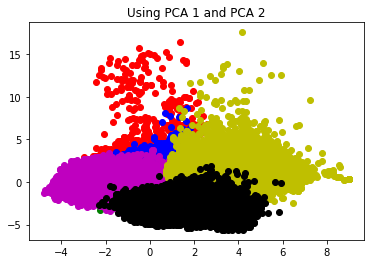

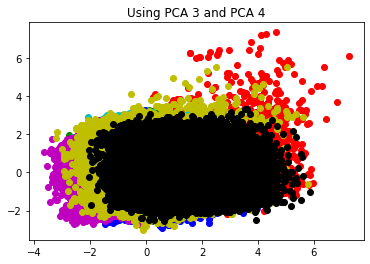

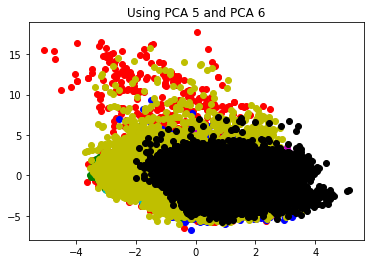

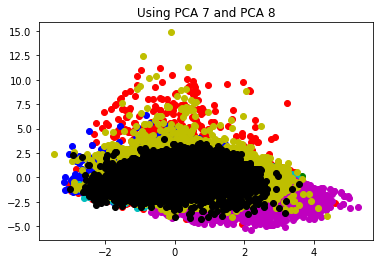

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
temp1 = spotifyPCA_DF[spotifyPCA_DF["pred"] == 0]
temp2 = spotifyPCA_DF[spotifyPCA_DF["pred"] == 1]
temp3 = spotifyPCA_DF[spotifyPCA_DF["pred"] == 2]
temp4 = spotifyPCA_DF[spotifyPCA_DF["pred"] == 3]
temp5 = spotifyPCA_DF[spotifyPCA_DF["pred"] == 4]
temp6 = spotifyPCA_DF[spotifyPCA_DF["pred"] == 5]
temp7 = spotifyPCA_DF[spotifyPCA_DF["pred"] == 6]
temp8 = spotifyPCA_DF[spotifyPCA_DF["pred"] == 7]
plt.scatter(temp1[0],temp1[1],color='r')
plt.scatter(temp2[0],temp2[1],color='g')
plt.scatter(temp3[0],temp3[1],color='b')
plt.scatter(temp4[0],temp4[1],color='c')
plt.scatter(temp5[0],temp5[1],color='m')
plt.scatter(temp6[0],temp6[1],color='y')
plt.scatter(temp7[0],temp7[1],color='k')
plt.title("Using PCA 1 and PCA 2")
plt.show()


plt.scatter(temp1[3],temp1[4],color='r')
plt.scatter(temp2[3],temp2[4],color='g')
plt.scatter(temp3[3],temp3[4],color='b')
plt.scatter(temp4[3],temp4[4],color='c')
plt.scatter(temp5[3],temp5[4],color='m')
plt.scatter(temp6[3],temp6[4],color='y')
plt.scatter(temp7[3],temp7[4],color='k')
plt.title("Using PCA 3 and PCA 4")
plt.show()

plt.scatter(temp1[5],temp1[6],color='r')
plt.scatter(temp2[5],temp2[6],color='g')
plt.scatter(temp3[5],temp3[6],color='b')
plt.scatter(temp4[5],temp4[6],color='c')
plt.scatter(temp5[5],temp5[6],color='m')
plt.scatter(temp6[5],temp6[6],color='y')
plt.scatter(temp7[5],temp7[6],color='k')
plt.title("Using PCA 5 and PCA 6")
plt.show()

plt.scatter(temp1[7],temp1[8],color='r')
plt.scatter(temp2[7],temp2[8],color='g')
plt.scatter(temp3[7],temp3[8],color='b')
plt.scatter(temp4[7],temp4[8],color='c')
plt.scatter(temp5[7],temp5[8],color='m')
plt.scatter(temp6[7],temp6[8],color='y')
plt.scatter(temp7[7],temp7[8],color='k')
plt.title("Using PCA 7 and PCA 8")
plt.show()

